In [1]:

#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 6.2MB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 1.2MB 16.6MB/s 
     |████████████████████████████████| 194kB 27.5MB/s 
     |████████████████████████████████| 61kB 10.7MB/s 
Mounted at /content/gdrive


In [3]:
#hide
from fastbook import *

In [4]:
# Training for Dogs
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_dog(x): return x[0].islower()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_dog, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.129043,0.026451,0.006089,00:53


epoch,train_loss,valid_loss,error_rate,time
0,0.056672,0.020364,0.004736,01:03


In [6]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()
im = Image.open(BytesIO(uploaded['dog1.jpg']))

Saving dog1.jpg to dog1.jpg


In [7]:

uploader = SimpleNamespace(data = ['dog1.jpg'])


In [8]:
img = PILImage.create(uploader.data[0])
is_dog,_,probs = learn.predict(img)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

Is this a dog?: True.
Probability it's a dog: 1.000000


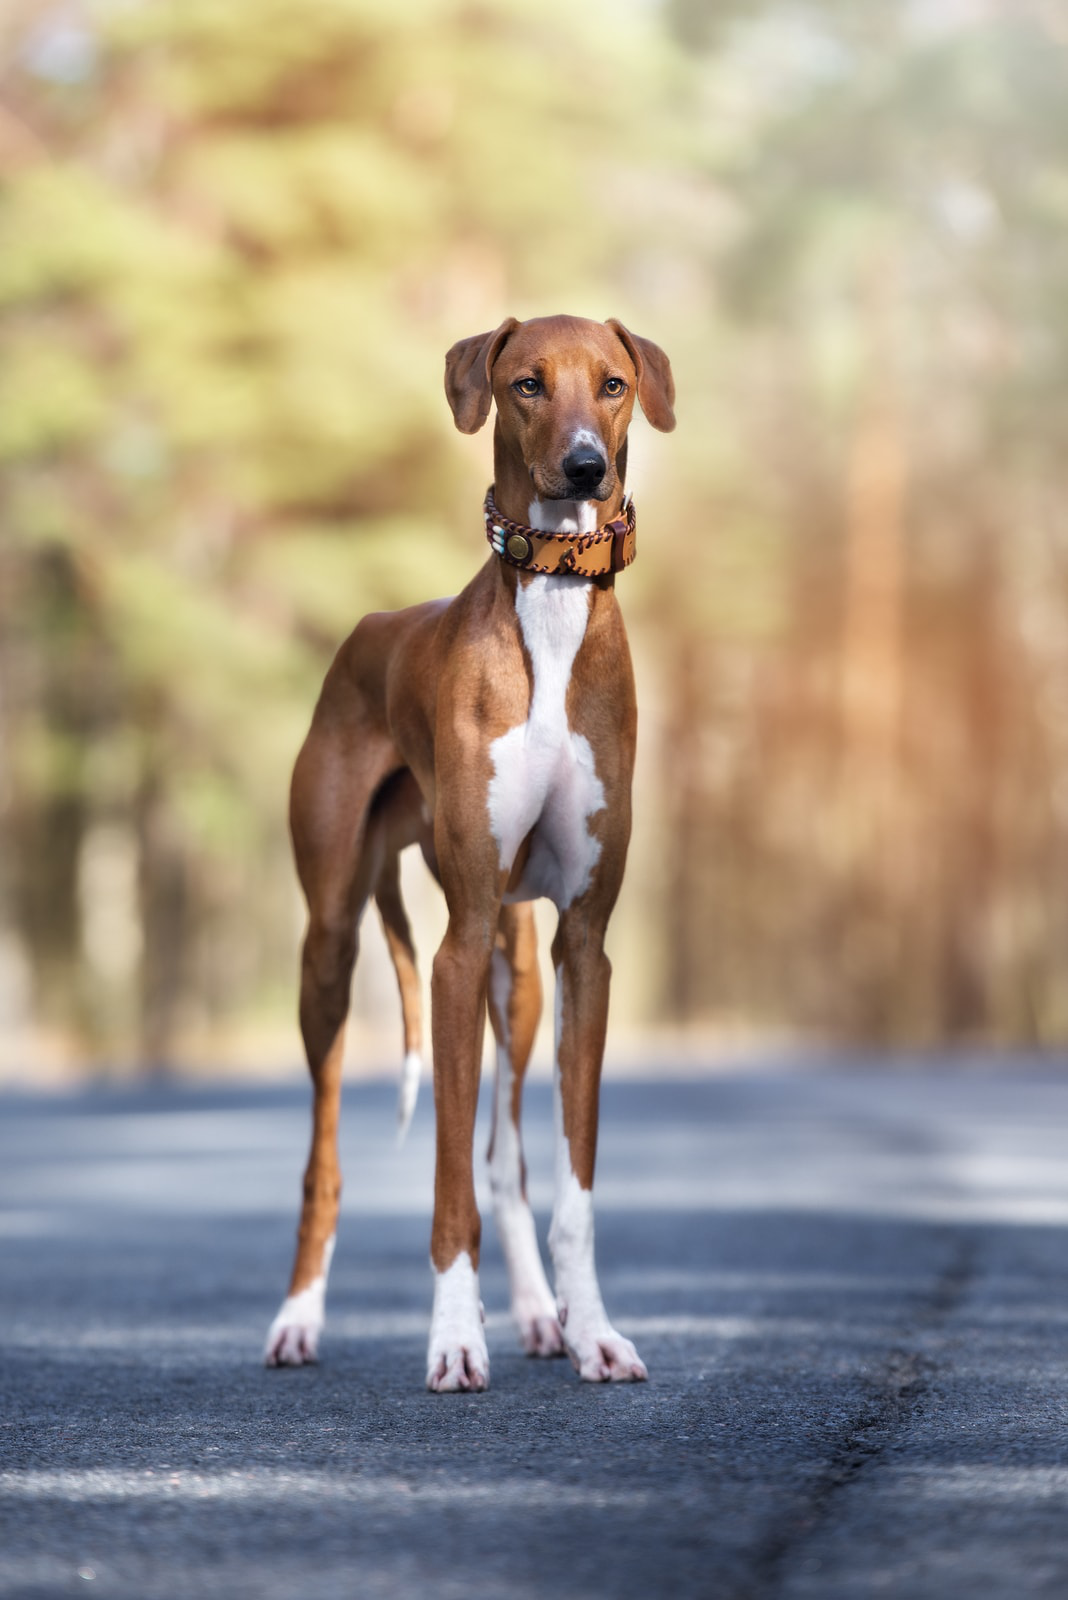

In [9]:
im

**Observation:**

Tried with expected dog image and the model predicts the animal the image correctly as dog.

**Trial 2:**

Test the model with lion image 

In [11]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded2 = files.upload()
im2 = Image.open(BytesIO(uploaded2['lion1.jpg']))

Saving lion1.jpg to lion1.jpg


In [12]:

uploader2 = SimpleNamespace(data = ['lion1.jpg'])

In [13]:
img2 = PILImage.create(uploader2.data[0])
is_dog2,_,probs2 = learn.predict(img2)
print(f"Is this a dog?: {is_dog2}.")
print(f"Probability it's a dog: {probs2[1].item():.6f}")

Is this a dog?: True.
Probability it's a dog: 0.999064


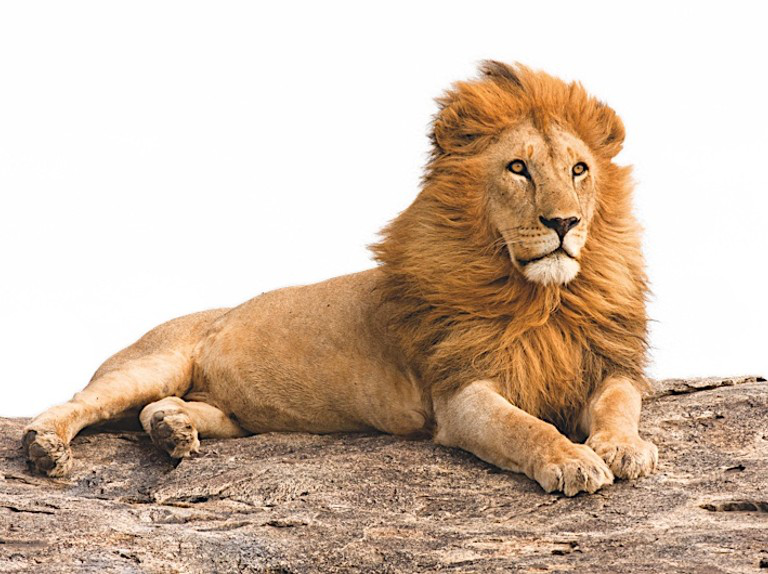

In [14]:
img2

**Observation:**

The model wrongly predicts a lion image as dog image with slightly lesser probability.

In [18]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [16]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.370238,0.361453,0.824324,00:04
1,0.353076,0.351816,0.835534,00:04
2,0.346179,0.348914,0.834920,00:04


In [22]:

learn.fit_one_cycle(10)


epoch,train_loss,valid_loss,time
0,0.573644,0.683633,00:00
1,0.595832,0.678919,00:00
2,0.579629,0.673063,00:00
3,0.565978,0.667850,00:00
4,0.553386,0.663380,00:00
5,0.550656,0.660714,00:00
6,0.533733,0.659132,00:00
7,0.520567,0.657656,00:00
8,0.520193,0.657157,00:00
9,0.514002,0.657101,00:00


**Observation:**

After a threshold, Increasing the cycle size doesnt bring in much improvement in reducing the loss

In [19]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.529044,1.408905,00:00


epoch,train_loss,valid_loss,time
0,1.381082,1.351930,00:00
1,1.275488,1.176427,00:00
2,1.030297,0.876587,00:00
3,0.803158,0.738822,00:00
4,0.688192,0.707288,00:00
5,0.646836,0.698586,00:00
6,0.620702,0.694772,00:00
7,0.612582,0.692963,00:00
8,0.611009,0.691829,00:00
9,0.611941,0.691844,00:00


In [23]:
learn.fine_tune(50)

epoch,train_loss,valid_loss,time
0,0.510320,0.650836,00:00


epoch,train_loss,valid_loss,time
0,0.494210,0.648970,00:00
1,0.502699,0.648685,00:00
2,0.488027,0.647812,00:00
3,0.487163,0.647185,00:00
4,0.482123,0.646364,00:00
5,0.478528,0.645182,00:00
6,0.464433,0.644243,00:00
7,0.454321,0.643473,00:00
8,0.445554,0.641441,00:00
9,0.428051,0.642220,00:00


**Observation:**

As observed in tabulardataloaders, after a threshold, Increasing the number of iteration doesnt contribute to the improvement in the performance of the model.

In [20]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,21.0,35.0,4.0,3.639602
1,48.0,72.0,2.0,3.219538
2,73.0,32.0,3.0,2.951449
3,14.0,18.0,3.0,3.922497
4,91.0,5.0,4.0,3.169584
5,55.0,25.0,2.5,3.405903
6,48.0,79.0,3.0,4.178968
7,28.0,79.0,2.0,3.027097
8,24.0,39.0,4.5,4.046745
